In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, LinearRegression, SGDRegressor

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

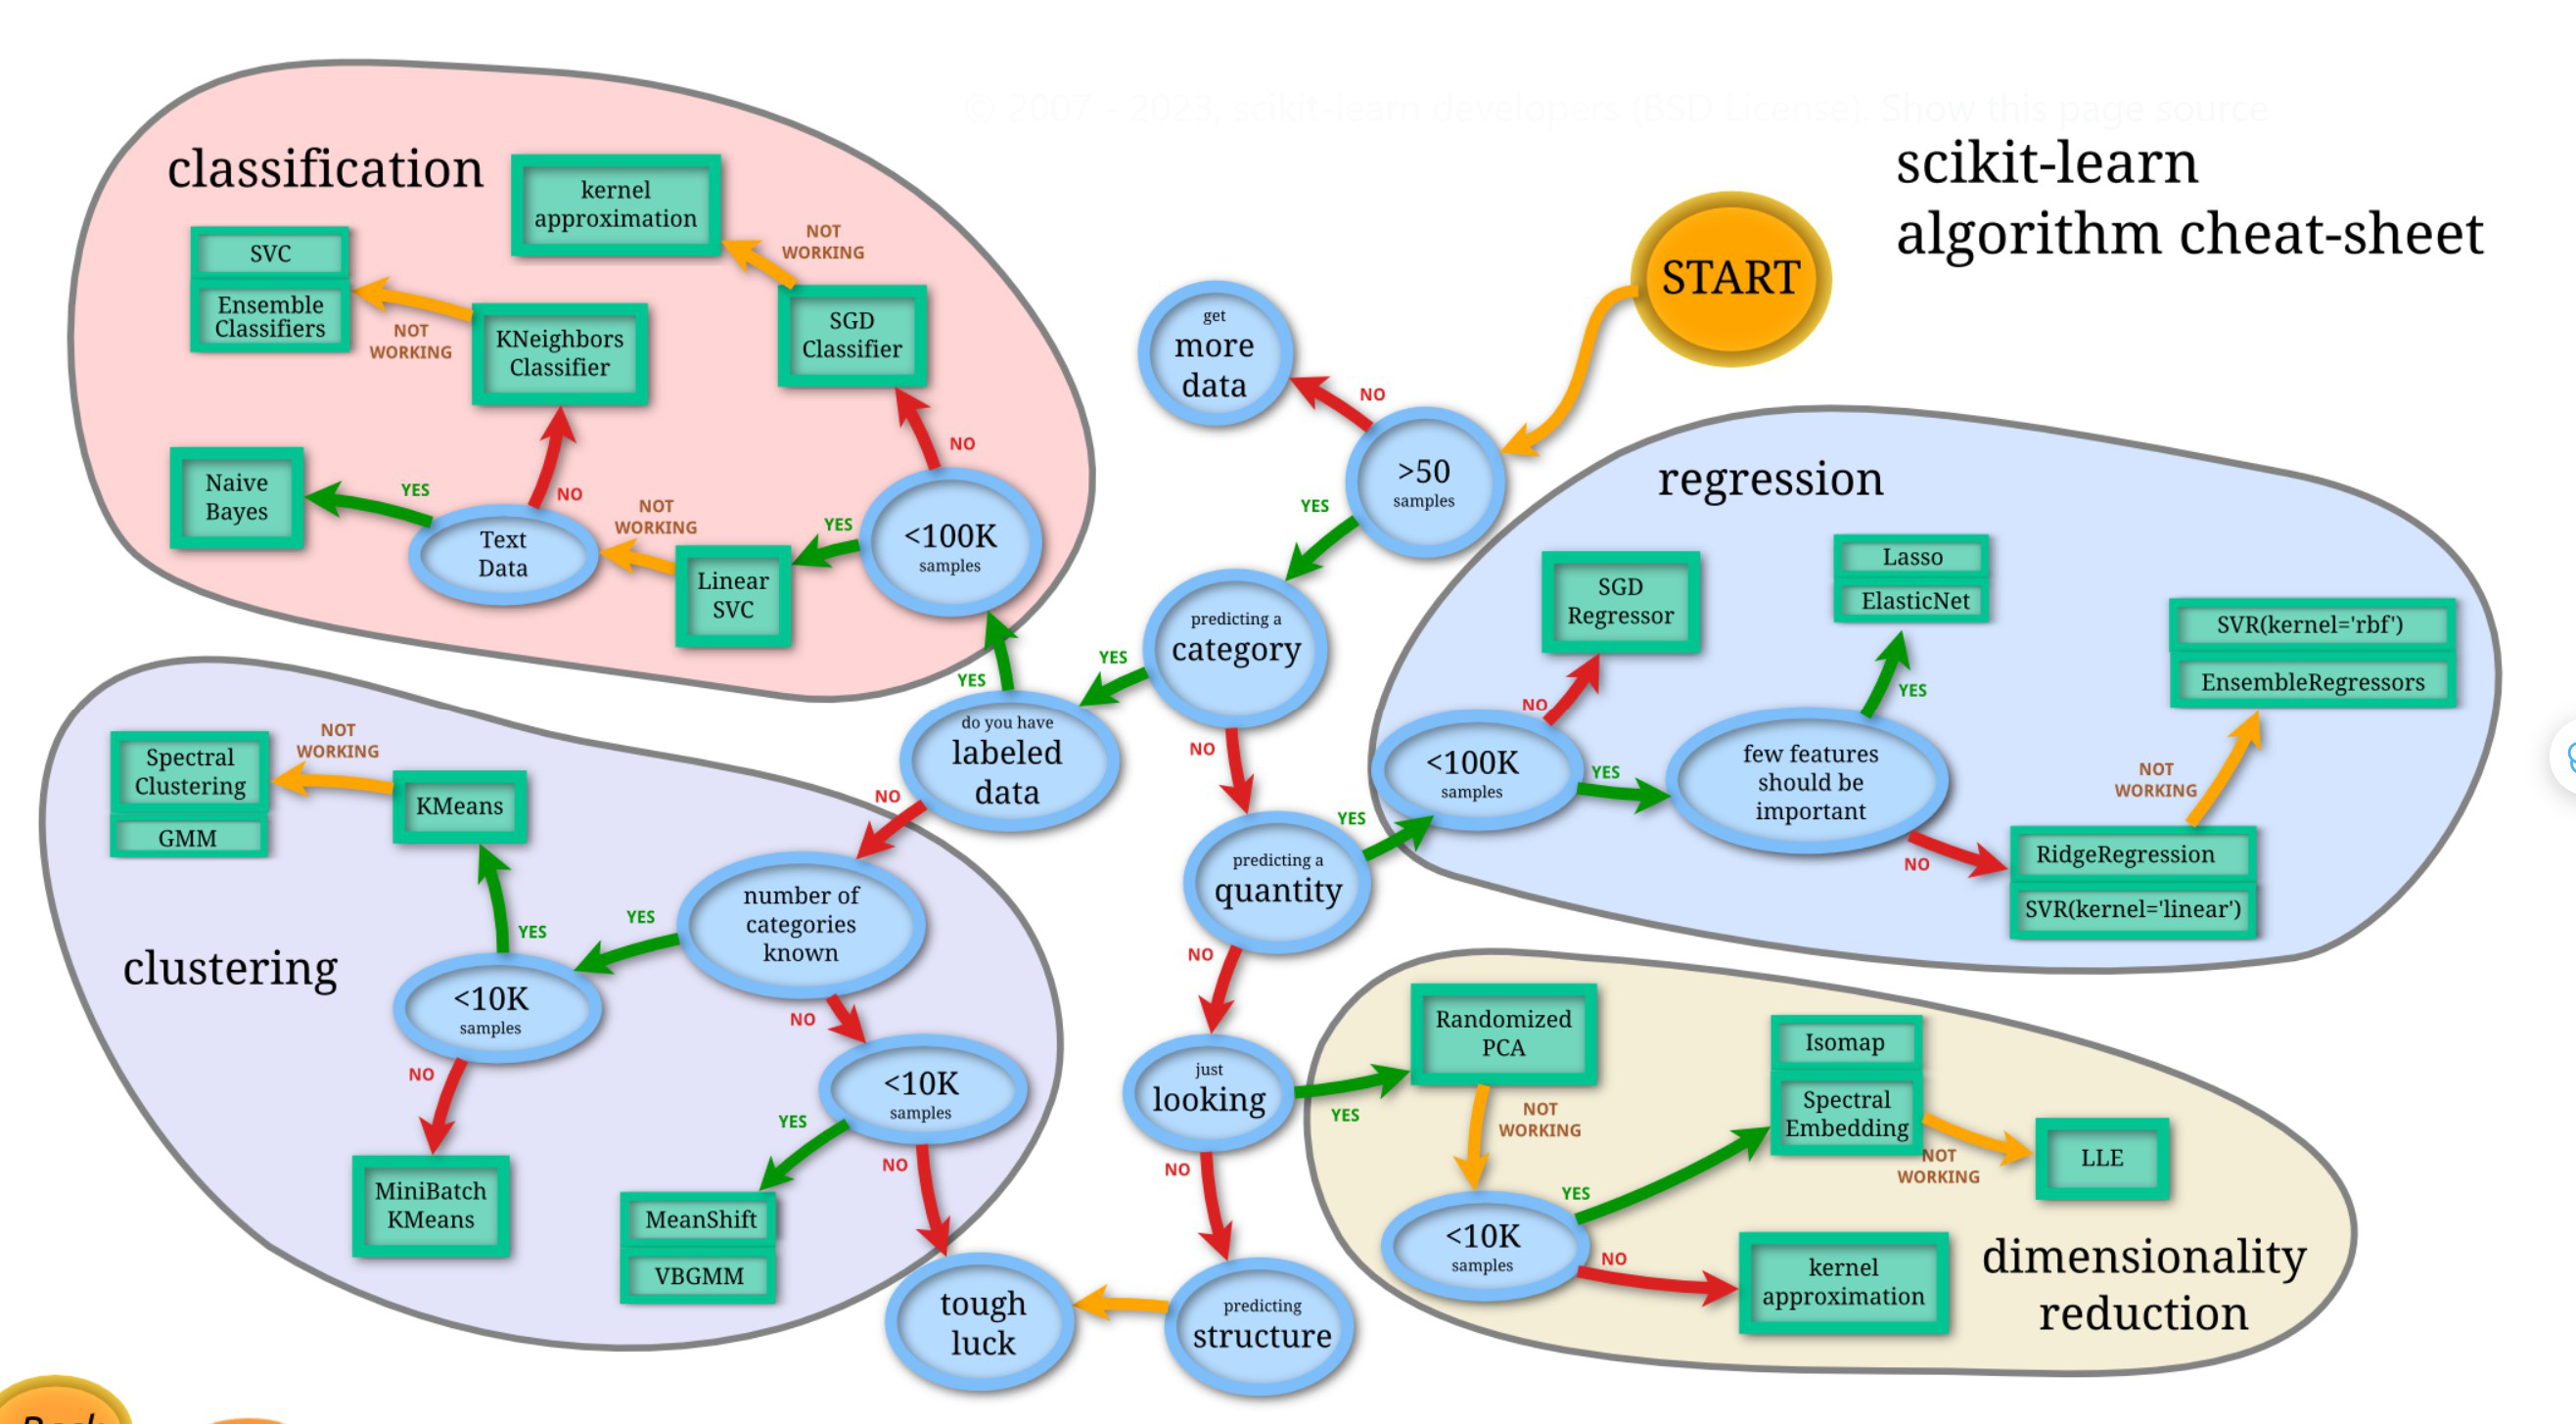

In [3]:
Image.open("Roadmap.jpg")

## Importing & Understanding Data

In [8]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
df.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

## Columns:

### id: A unique identifier or reference number for each record in the dataset.

### date: The date when the data for this record was collected or recorded.

### price: The price of the property or house associated with this record.

### bedrooms: The number of bedrooms in the property.

### bathrooms: The number of bathrooms in the property.

### sqft_living: The total square footage of the living space in the property.

### sqft_lot: The total square footage of the land or lot associated with the property.

### floors: The number of floors or levels in the property.

### waterfront: A binary indicator (e.g., 0 or 1) that indicates whether the property has a waterfront view or access.

### view: A variable that might indicate the level of view from the property (e.g., 0 to 4, where 0 is the lowest and 4 is the highest).

### condition: A variable that describes the overall condition of the property (e.g., from 1 to 5, where 1 is the worst and 5 is the best).

### grade: A variable that represents the overall grade or quality of the property.

### sqft_above: The square footage of the property above ground.

### sqft_basement: The square footage of the property's basement.

### yr_built: The year when the property was originally built or constructed.

### yr_renovated: The year when the property underwent renovation or significant upgrades.

### zipcode: The ZIP code or postal code of the property's location.

### lat: The latitude coordinates of the property's location.

### long: The longitude coordinates of the property's location.

### sqft_living15: The square footage of the living space of a neighboring property (probably one of the 15 nearest) for comparison.

### sqft_lot15: The square footage of the land of a neighboring property (probably one of the 15 nearest) for comparison.

## Exploratory Data Analysis

In [9]:
df.shape

(21613, 21)

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
df = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
 17  price          21613 non-null  float64
dtypes: flo

In [5]:
df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.390691   
std        0.086517      0.766318      0.650743      1.175459    828.090978   
min        0.000000      0.000000      1.000000      1.000000    290.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2210.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean      291.509045   1971.005136     84.402258     47.560053   -122.213896   
std       442.575043     29.373411    401.679240      0.138564      0.140828   
min         0.000000   1900.000000      0.000000     47.155900   -122.519000   
25%         0.000000   1951.000000      0.000000     47.471000   -122.328000   
50%         0.000000   1975.000000      0.000000     47.571800   -122.230000   
75%       560.000000   1997.000000      0.000000     47.678000   -122.125000   
max      4820.000000   2015.000000   2015.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15         price  
count   21613.000000   21613.000000  2.161300e+04  
mean     1986.552492   12768.455652  5.400881e+05  
std       685.391304   27304.179631  3.671272e+05  
min       399.000000     651.000000  7.500000e+04  
25%      1490.000000    5100.000000  3.219500e+05  
50%      1840.000000    7620.000000  4.500000e+05  
75%      2360.000000   10083.000000  6.450000e+05  
max      6210.000000  871200.000000  7.700000e+06

<AxesSubplot:>

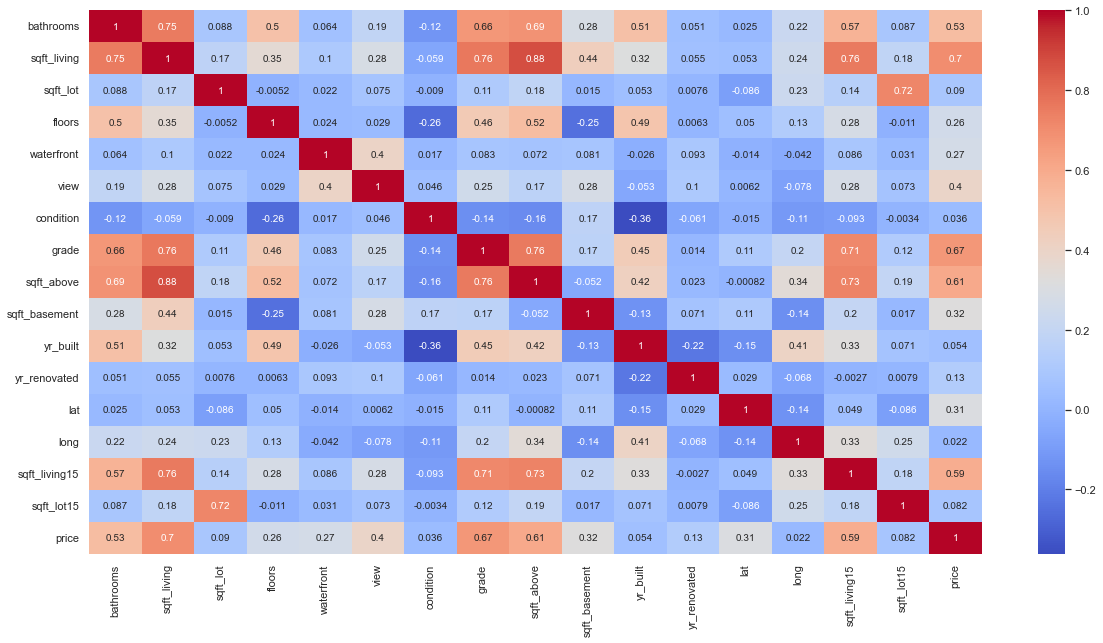

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,cmap='coolwarm')

<Figure size 1440x1440 with 0 Axes>

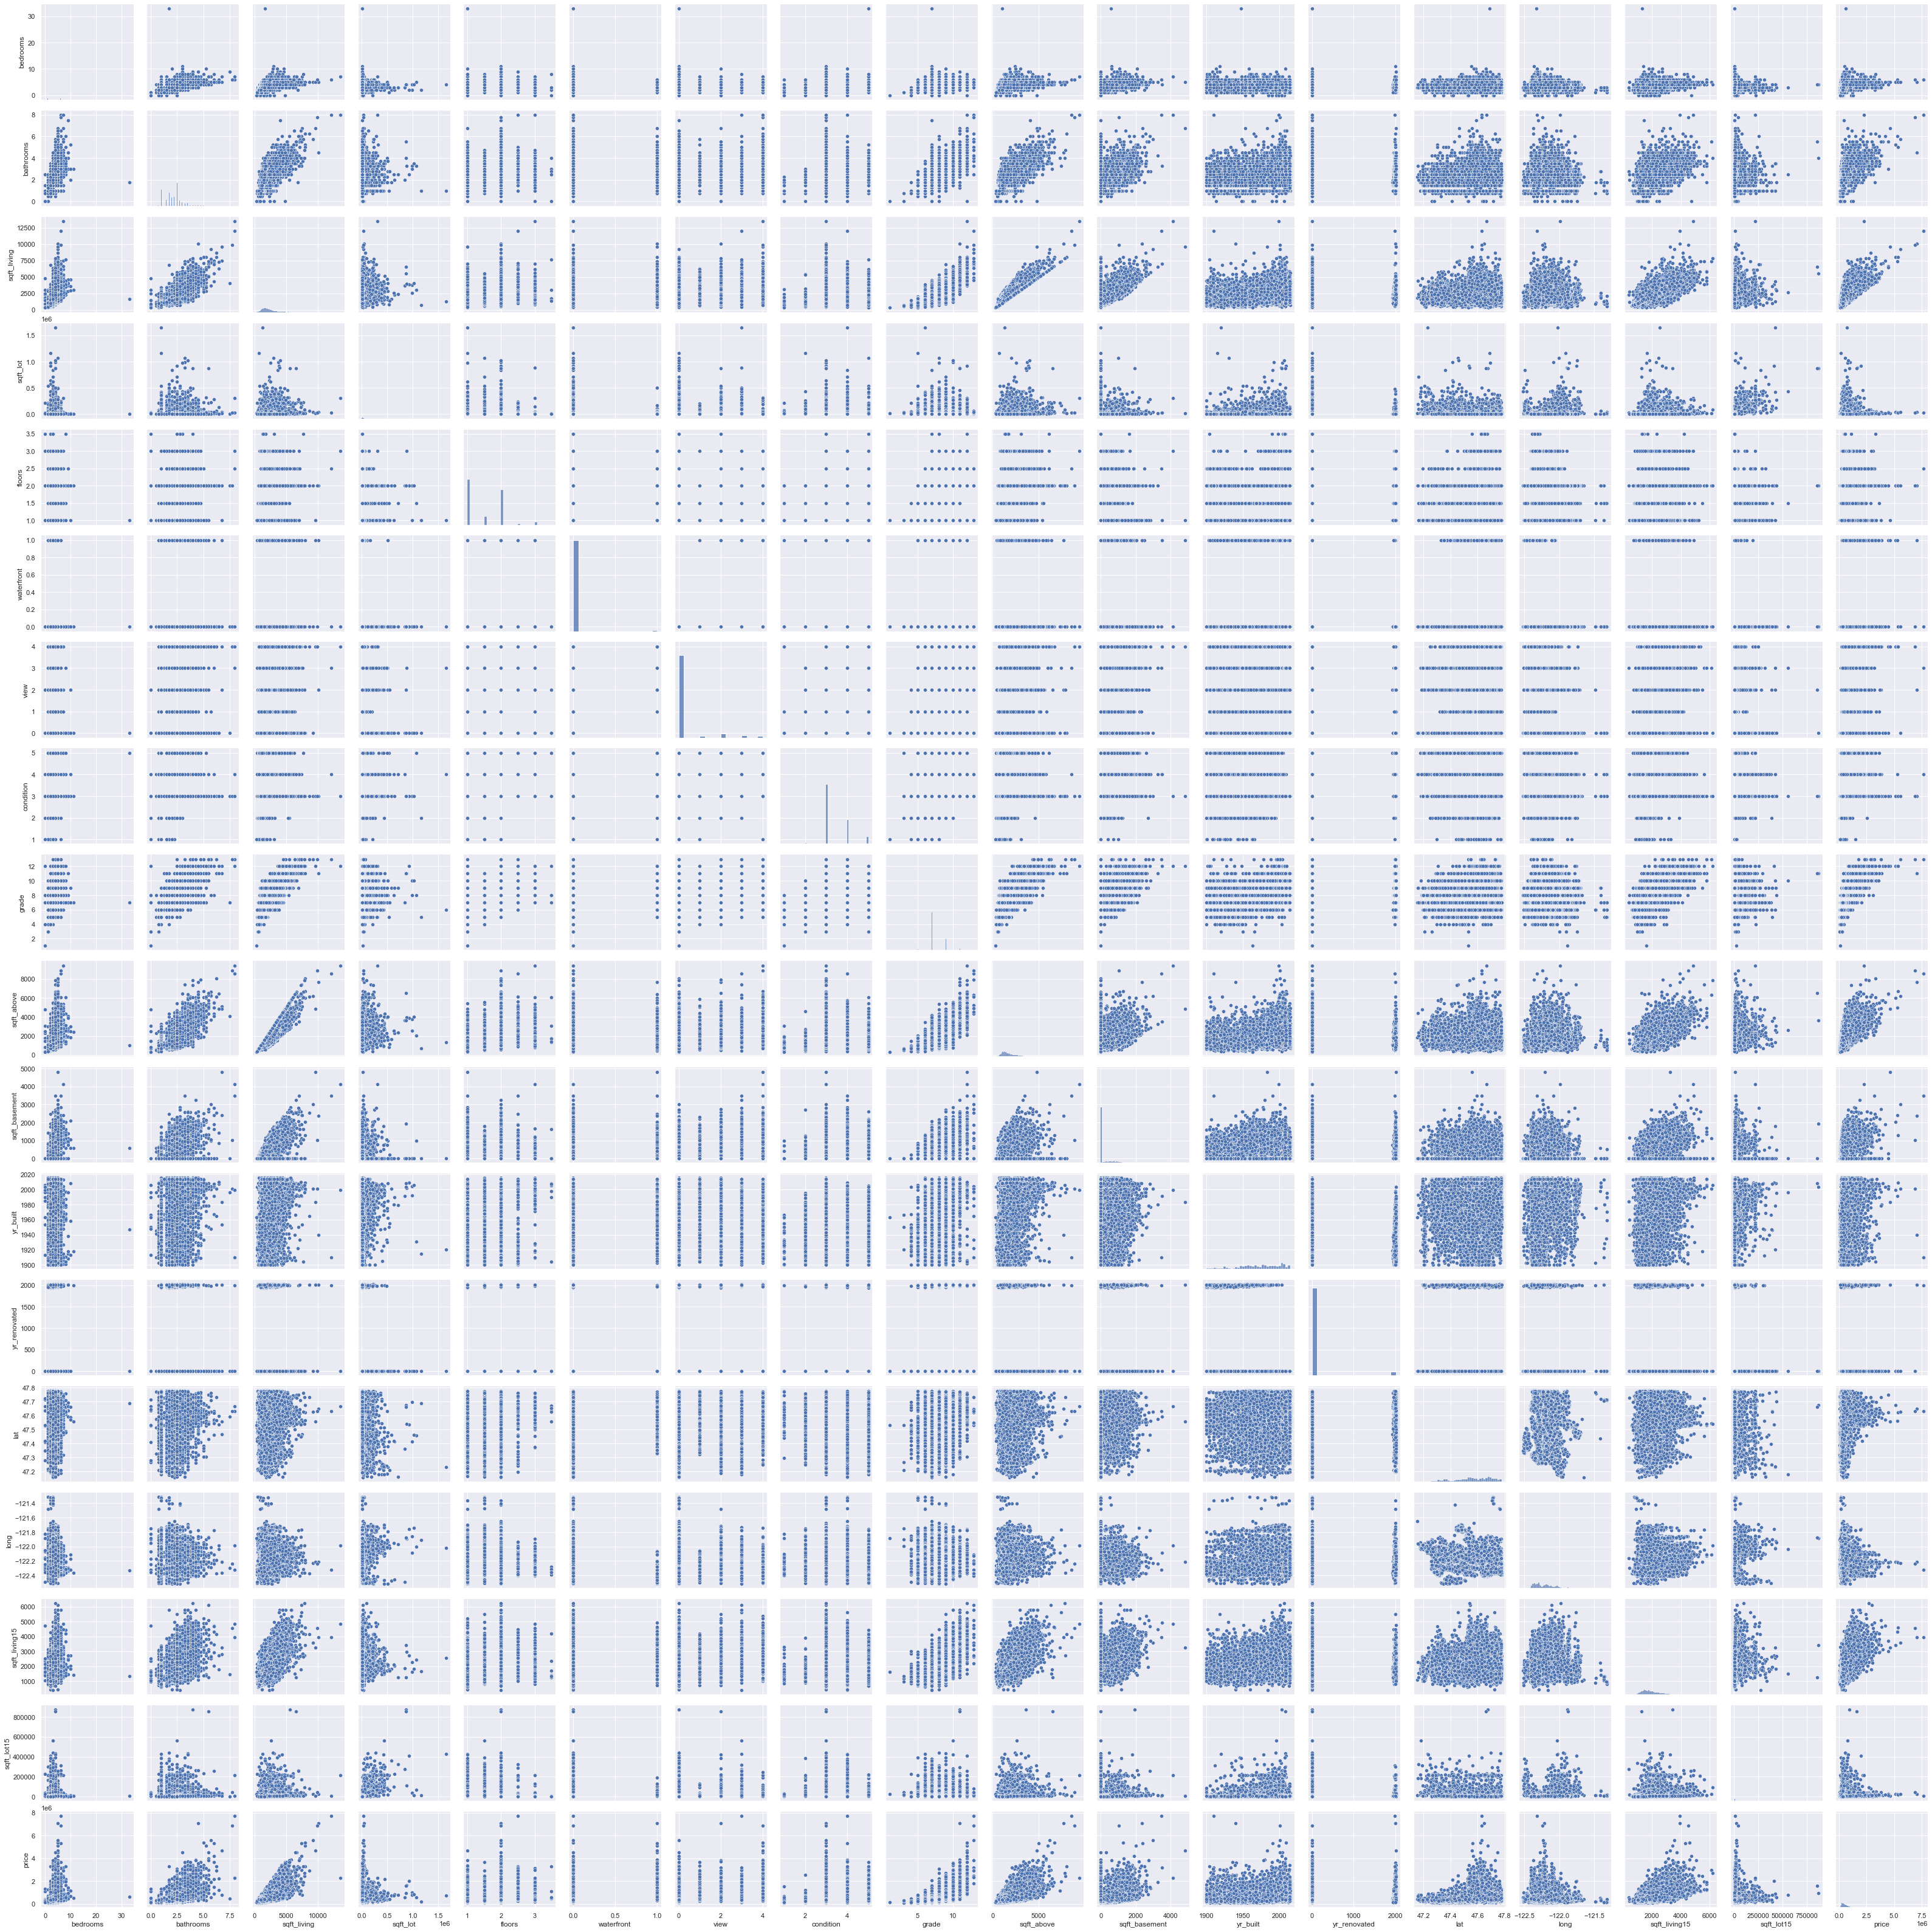

In [20]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

In [ ]:
## Preproccessing

In [ ]:
## Null Values

In [12]:
df.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [ ]:
## Duplicated Values

In [13]:
df[df.duplicated()]

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
3951          4       1.75         2410      8447     2.0           0     3   
4352          2       2.00         1070       649     2.0           0     0   
14983         3       2.50         2290      5089     2.0           0     0   
20054         3       2.50         1940      3211     2.0           0     0   
20524         3       2.25         1410       905     3.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
3951           4      8        2060            350      1936          1980   
4352           3      9         720            350      2008             0   
14983          3      9        2290              0      2001             0   
20054          3      8        1940              0      2009             0   
20524          3      9        1410              0      2014             0   

           lat     long  sqft_living15  sqft_lot15     price  
3951   47.6499 -122.088           2520       14789  550000.0  
4352   47.5213 -122.357           1070         928  259950.0  
14983  47.5443 -122.172           2290        7984  585000.0  
20054  47.5644 -122.093           1880        3078  555000.0  
20524  47.5818 -122.402           1510        1352  529500.0

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(21608, 18)

## Feature Engineering

In [17]:
X = df.drop(columns='price')
y = df['price']

In [18]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [81]:
## Models

In [26]:
def fitting_models(x, y, cv=3):
    names = []
    scores_mse = []
    scores_rmse = []
    scores_r2 = []
    
    regressors = [
        ('LinearRegression', LinearRegression()),
        ('DecisionTreeRegressor', DecisionTreeRegressor()),
        ('RandomForestRegressor', RandomForestRegressor()),
        ('GradientBoostingRegressor', GradientBoostingRegressor()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('SGDRegressor', SGDRegressor()),
        ('SVR', SVR()),
        ('Lasso', Lasso(alpha=0.1, max_iter=1000)),
        ('Ridge', Ridge())
    ]
    
    for model in regressors:
        names.append(model[0])
        
        cv_results = cross_validate(model[1], x, y, cv=cv, scoring=('r2', 'neg_mean_squared_error'))

        mse = -cv_results['test_neg_mean_squared_error'].mean()
        r2_score = cv_results['test_r2'].mean()
        rmse = np.sqrt(mse)
        
        scores_mse.append(mse)
        scores_rmse.append(rmse)
        scores_r2.append(r2_score)
        
        print(f"Model's name: {model[0]}: MSE -> {mse}; RMSE -> {rmse}; 'R2' -> {r2_score}")
    data = pd.DataFrame({'names':names,'mse':scores_mse,'rmse':scores_rmse,'r2':scores_r2})
    
    return data


In [27]:
fitting_models(X,y)

Model's name: LinearRegression: MSE -> 41683037231.50327; RMSE -> 204164.2408246441; 'R2' -> 0.6904344546808483
Model's name: DecisionTreeRegressor: MSE -> 36674145203.295876; RMSE -> 191504.94824754758; 'R2' -> 0.7278107725459835
Model's name: RandomForestRegressor: MSE -> 17862209711.414646; RMSE -> 133649.57804428207; 'R2' -> 0.8673020651121496
Model's name: GradientBoostingRegressor: MSE -> 18802464983.669285; RMSE -> 137122.08058394273; 'R2' -> 0.8603022704826419
Model's name: KNeighborsRegressor: MSE -> 30051786574.89069; RMSE -> 173354.511262011; 'R2' -> 0.7768583548611657
Model's name: SGDRegressor: MSE -> 42032132193.57139; RMSE -> 205017.39485607407; 'R2' -> 0.6878673538640231
Model's name: SVR: MSE -> 142537823760.9012; RMSE -> 377541.8172347286; 'R2' -> -0.05836444205586481


C:\Users\TECHNO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.781e+13, tolerance: 1.904e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\TECHNO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+13, tolerance: 1.970e+11
  model = cd_fast.enet_coordinate_descent(


Model's name: Lasso: MSE -> 41677168362.41757; RMSE -> 204149.86740729853; 'R2' -> 0.6904782340181962
Model's name: Ridge: MSE -> 41677037392.98817; RMSE -> 204149.54663919332; 'R2' -> 0.6904792417403046


C:\Users\TECHNO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+13, tolerance: 1.950e+11
  model = cd_fast.enet_coordinate_descent(


names           mse           rmse        r2
0           LinearRegression  4.168304e+10  204164.240825  0.690434
1      DecisionTreeRegressor  3.667415e+10  191504.948248  0.727811
2      RandomForestRegressor  1.786221e+10  133649.578044  0.867302
3  GradientBoostingRegressor  1.880246e+10  137122.080584  0.860302
4        KNeighborsRegressor  3.005179e+10  173354.511262  0.776858
5               SGDRegressor  4.203213e+10  205017.394856  0.687867
6                        SVR  1.425378e+11  377541.817235 -0.058364
7                      Lasso  4.167717e+10  204149.867407  0.690478
8                      Ridge  4.167704e+10  204149.546639  0.690479

In [ ]:
## The Best Models RandomForestRegressor & GradientBoostingRegressor